<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

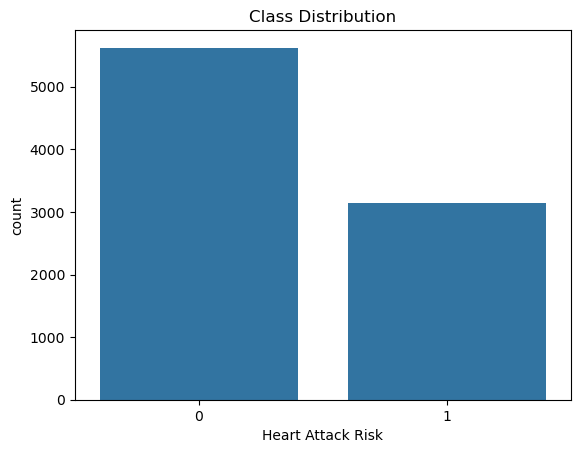

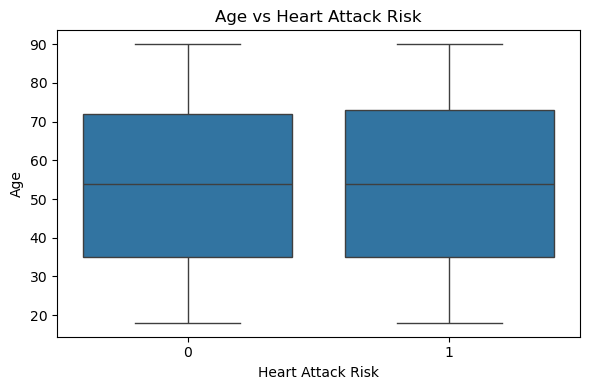

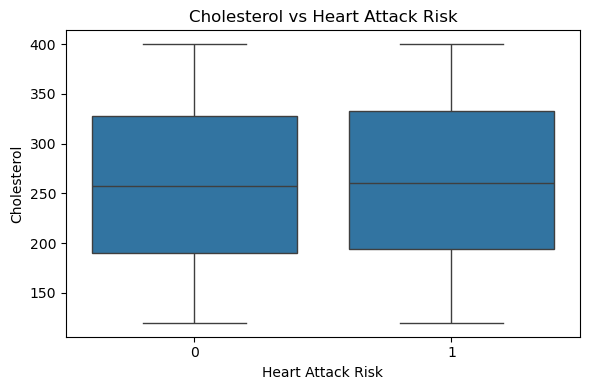

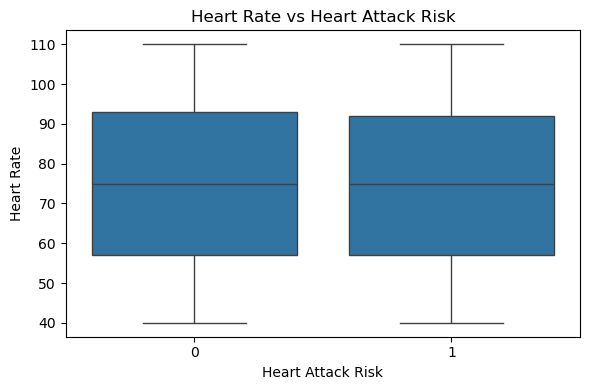

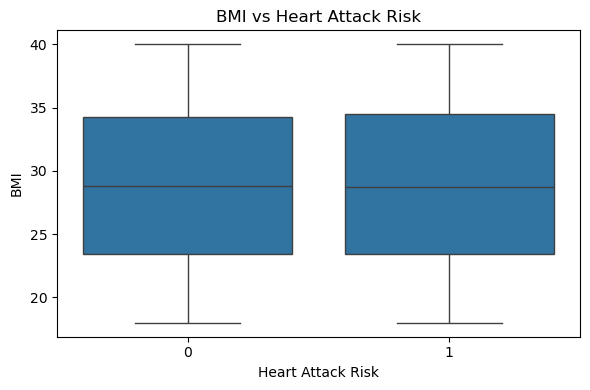

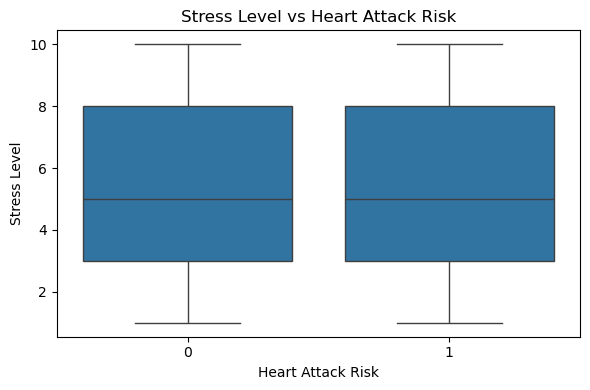

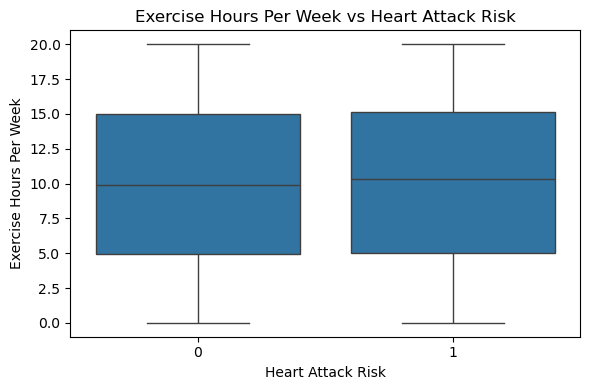

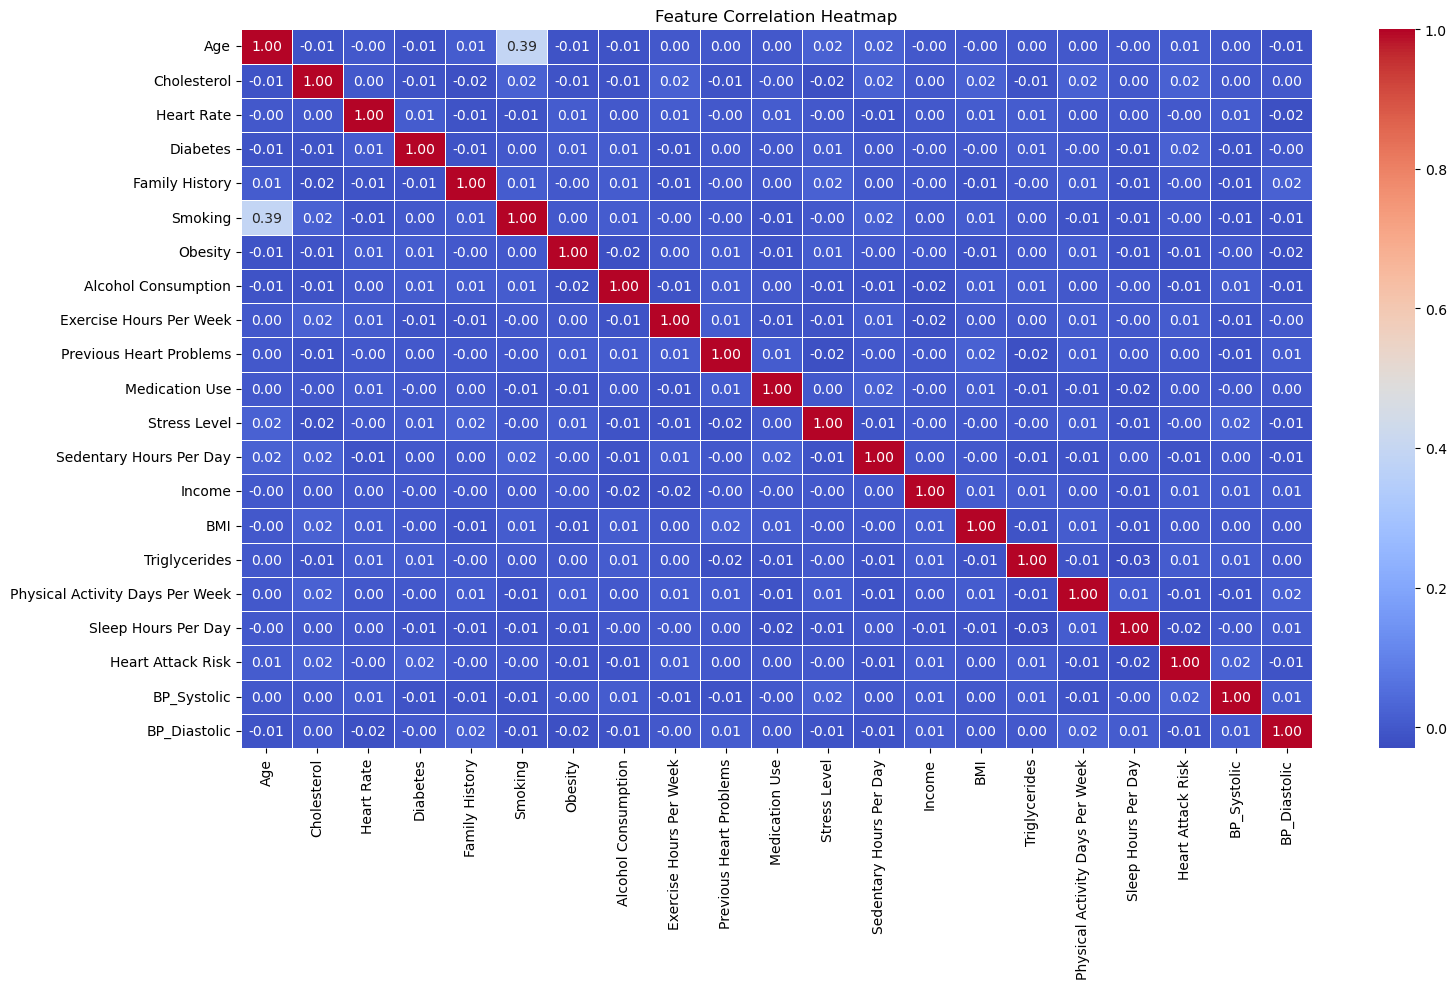


Correlation with Heart Attack Risk:
Cholesterol                        0.02
Diabetes                           0.02
BP_Systolic                        0.02
Age                                0.01
Income                             0.01
Exercise Hours Per Week            0.01
Triglycerides                      0.01
Heart Rate                        -0.00
Medication Use                     0.00
Family History                    -0.00
Previous Heart Problems            0.00
Smoking                           -0.00
Stress Level                      -0.00
BMI                                0.00
Obesity                           -0.01
Alcohol Consumption               -0.01
Sedentary Hours Per Day           -0.01
Physical Activity Days Per Week   -0.01
BP_Diastolic                      -0.01
Sleep Hours Per Day               -0.02
Name: Heart Attack Risk, dtype: float64


In [51]:
# Heart Disease Prediction Using Logistic Regression
# Project: Logistic Regression for Medical Prediction

# --- Step 1: Dataset Exploration ---

# What: Load and explore the dataset
# Why: Understand feature types, distributions, and potential data quality issues
# How:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('heart.csv')

# Fix blood pressure to numerical systolic/diastolic values
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df.drop(columns=['Blood Pressure'], inplace=True)

# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualize class distribution
sns.countplot(data=df, x='Heart Attack Risk')
plt.title("Class Distribution")
plt.show()

# Boxplots for selected features
selected_features = ['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Stress Level', 'Exercise Hours Per Week']
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Heart Attack Risk', y=feature)
    plt.title(f'{feature} vs Heart Attack Risk')
    plt.tight_layout()
    plt.show()

# Correlation heatmap (numerical only)
plt.figure(figsize=(16, 10))
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

print("\nCorrelation with Heart Attack Risk:")
print(correlation_matrix['Heart Attack Risk'].drop('Heart Attack Risk').sort_values(ascending=False))

In [52]:
# --- Step 2: Data Preprocessing ---

# What: Preprocess the dataset
# Why: Prepare numerical and categorical features for modeling
# How:
from sklearn.preprocessing import StandardScaler

# Drop ID and location-related columns (they don't help prediction)
columns_to_drop = ['Patient ID', 'Country', 'Continent', 'Hemisphere']
df_clean = df.drop(columns=columns_to_drop)

# One-hot encode only low-cardinality categorical features
df_clean = pd.get_dummies(df_clean, columns=['Sex', 'Diet'], drop_first=True)

# Separate features and target
X = df_clean.drop('Heart Attack Risk', axis=1)
y = df_clean['Heart Attack Risk']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# --- Step 3: Train-Test Split (Stratified) ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [54]:
# --- Step 4: Logistic Regression Setup ---
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)

In [55]:
# --- Step 5: Model Training ---
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [56]:
# --- Step 6: Prediction Generation ---
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred_custom = (y_probs >= threshold).astype(int)

Accuracy: 0.6418
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.4940


D:\Dev\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


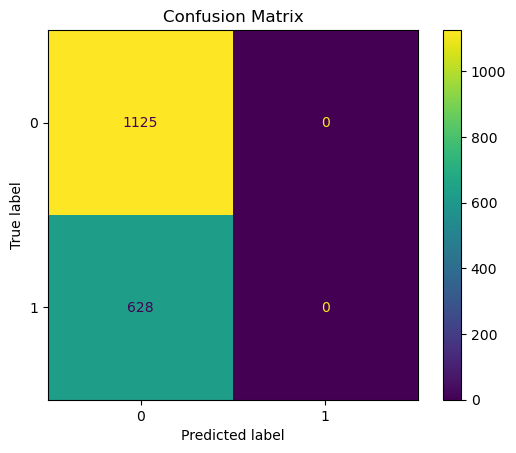

In [57]:
# --- Step 7: Performance Evaluation ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
auc = roc_auc_score(y_test, y_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

                            Feature  Coefficient
17              Sleep Hours Per Day    -0.056305
19                     BP_Diastolic    -0.041323
6                           Obesity    -0.035463
13                           Income     0.034447
15                    Triglycerides     0.032978
18                      BP_Systolic     0.030507
8           Exercise Hours Per Week     0.028277
7               Alcohol Consumption    -0.027457
1                       Cholesterol     0.026431
21                     Diet_Healthy     0.025151
3                          Diabetes     0.024865
0                               Age     0.024793
11                     Stress Level    -0.024704
2                        Heart Rate    -0.022186
5                           Smoking    -0.016354
12          Sedentary Hours Per Day    -0.015284
20                         Sex_Male     0.013150
16  Physical Activity Days Per Week    -0.010401
22                   Diet_Unhealthy     0.010121
9           Previous

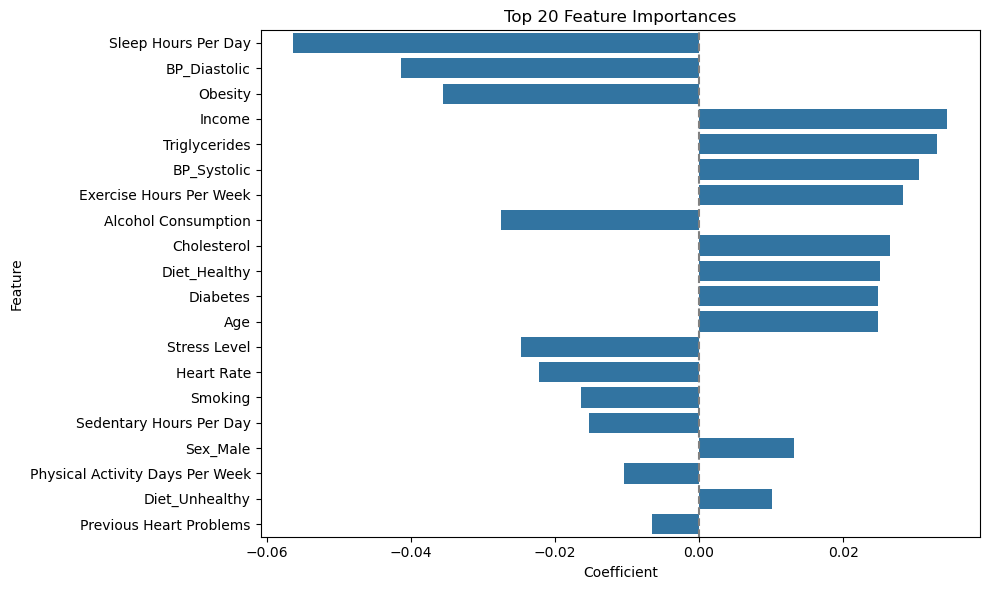

In [58]:
# --- Step 8: Results Interpretation ---
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(20))

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(20), x='Coefficient', y='Feature')
plt.title('Top 20 Feature Importances')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [59]:
# --- Step 9: Limitations and Real-World Considerations ---
# - Data may still be synthetic or loosely defined
# - BP converted to numerical but assumptions remain
# - Logistic regression provides baseline; complex models might yield more insight